<a href="https://colab.research.google.com/github/yipf1123/human_edu/blob/main/Python/230327%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#모델 1


## 분류 문제
- 도미 데이터 준비하기

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

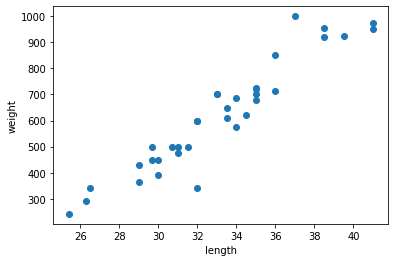

In [2]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(bream_length, bream_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

- 빙어 데이터 준비하기

In [3]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

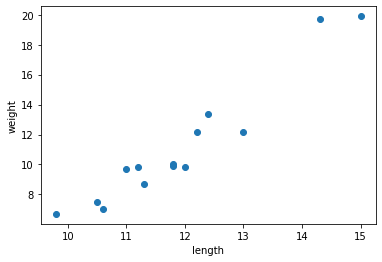

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(smelt_length, smelt_weight)
ax.set_xlabel('length')
ax.set_ylabel('weight')
plt.show()

## 첫 번째 머신러닝 프로그램

In [5]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [6]:
fish_data = [[l,w] for l, w in zip(length, weight)]
fish_data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [7]:
# 1은 도미
# 0은 빙어
fish_target = [1] * 35 + [0] *14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 지도학습 알고리즘 적용

In [8]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier()
# 알고리즘 + 데이터 활용해서 학습
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [9]:
kn.score(fish_data,fish_target) #1.0 은 정확도가 100%

1.0

In [10]:
kn.predict([[30,600]])

array([1])

In [11]:
kn.predict([[12,0]])

array([0])

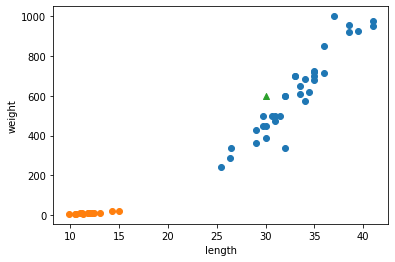

In [12]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#모델 2

In [13]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [14]:
fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 +[0]*14

## 훈련 데이터 테스트 데이터로 분리
- 리스트로 numpy배열로 좋음


In [15]:
# 도미데이터
train_input = fish_data[:35]
train_target = fish_target[:35]
# 빙어데이터터
test_input = fish_data[35:]
test_target = fish_target[35:]

In [16]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier()
# 알고리즘 + 데이터 활용해서 학습
kn = kn.fit(train_input, train_target) #도미데이터로 학습하고
kn.score(test_input, test_target) #빙어데이터로 테스트함
# 그래서 정확도가 0%

0.0

NumPy 배열 변환

In [17]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr[:5])
print(input_arr.shape)


[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]
(49, 2)


In [18]:
# 데이터 섞기
np.random.seed(42)
index= np.arange(49)
np.random.shuffle(index)

In [19]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [20]:
print(input_arr[[1,3]])

[[ 26.3 290. ]
 [ 29.  363. ]]


In [21]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

print(input_arr[13], train_input[0])      

[ 32. 340.] [ 32. 340.]


In [22]:
test_input = input_arr[index[32:]]
test_target = target_arr[index[32:]]

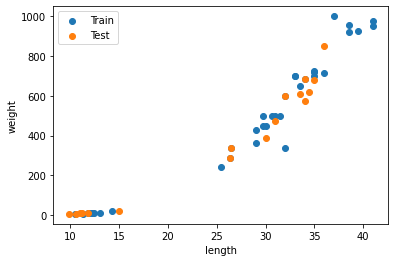

In [23]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1], label = "Train") # train_input[:, 0] 모든 행과 첫 번째 열을 선택
plt.scatter(test_input[:, 0], test_input[:, 1], label= "Test")
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

##두번째 머신러닝 코드 작성

In [24]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier()
# 알고리즘 + 데이터 활용해서 학습
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [25]:
kn.predict(test_input) # 예측값

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

# 모델 3
- KNN 알고리즘에 대해서 좀 더 알아보자!
- 이 알고리즘의 치명적인 약점을 파악함.
- 여러 모형을 생성해서 비교
- 최적의 값이 나올 때 까지

In [27]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [29]:
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
#fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [31]:
# 타켓 데이터 = 종속 변수 = 반응 변수
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 사이킷런으로 훈련세트와 테스트 세트 나누기

In [32]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42
)

train_input.shape, test_input.shape, train_target.shape, test_target.shape

((36, 2), (13, 2), (36,), (13,))

In [33]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [34]:
from sklearn.neighbors import KNeighborsClassifier
# 알고리즘 호출
kn = KNeighborsClassifier() # kn객체 생성
# 알고리즘 + 데이터 활용해서 학습
kn = kn.fit(train_input, train_target) # 훈련데이터 학습
kn.score(test_input, test_target) # 정확도 계산

1.0

In [35]:
print(kn.predict([[25,150]])) #0은 빙어 # 1은 도미

[0.]


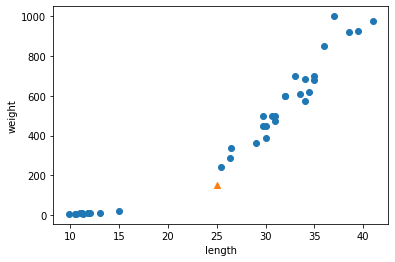

In [36]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 문제점 파악

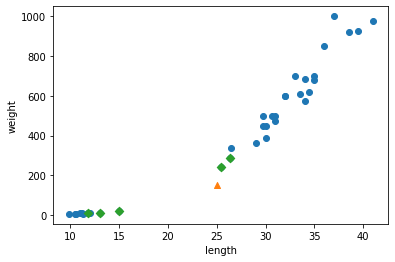

In [39]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1 ],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 단위와 기준을 맞춤
--> Scaling(표준화, 정규화)

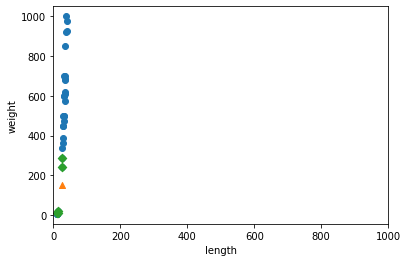

In [40]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(25,150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1 ],marker='D')
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 표준화 작업

In [42]:
mean = np.mean(train_input, axis=0) # 열(axis=0) 별로 평균(mean)을 계산
std =np.std(train_input, axis=0) # 열(axis=0) 별로 표준편차(std)를 계산 

print(mean, std)

[ 26.175      418.08888889] [ 10.21073441 321.67847023]


In [43]:
train_scaled = (train_input - mean ) / std

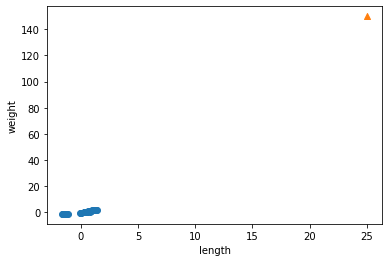

In [45]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [47]:
new = ([25,150] - mean) /std
new

array([-0.11507497, -0.83340638])

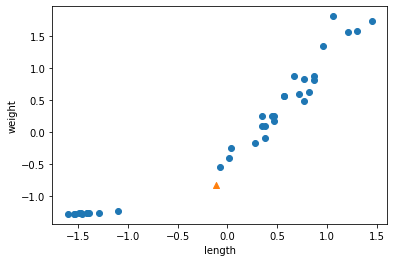

In [48]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

## 모델 재학습

In [49]:
kn.fit(train_scaled,train_target)

KNeighborsClassifier()

In [50]:
test_scaled = (test_input - mean) /std
kn.score(test_scaled, test_target)

1.0

In [51]:
kn.predict([new])

array([1.])

In [55]:
distances, indexes = kn.kneighbors([new])
print(distances, indexes)

[[0.28867034 0.45345741 0.60864646 0.76935617 0.89243065]] [[12 19 21  1 31]]


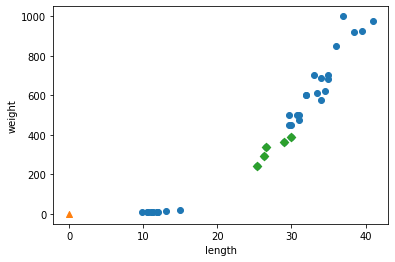

In [57]:
distances, indexes = kn.kneighbors([new])
plt.scatter(train_input[:,0], train_input[:, 1])
plt.scatter(new[0],new[1], marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1 ],marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

#수치 예측

In [58]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

- 농어의 길이를 보고 무게를 예측

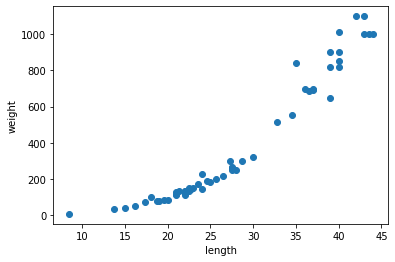

In [59]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

- 데이터셋 분리


In [80]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    #독립변수,   #종속변수
    perch_length, perch_weight, random_state=42
)
train_input.shape, test_input.shape, train_target.shape, test_target.shape

((42,), (14,), (42,), (14,))

In [64]:
# 1차원 배열 --> 2차원 배열
train_input = train_input.reshape(-1,1)
print(train_input.ndim)
print(train_input.shape)

2
(42, 1)


In [82]:
test_input = test_input.reshape(-1, 1)
print(test_input.ndim)
print(test_input.shape)

2
(14, 1)


In [66]:
train_input.shape, test_input.shape

((42, 1), (14,))

- 모형학습, score

In [70]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

# 회귀모델을 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [83]:
# 결정계수
knr.score(test_input, test_target)

0.992809406101064

- 1에 가까우면 가까울수록 모형의 신뢰도가 좋은 편
 - 독립변수와 종속변수간의 상관관계가 높은편
- 0에 가까우면 가까울수록 모형의 신뢰도는 안 좋은 편
 - 독립변수와 종속변수간의 상관관계가 낮은 편편

In [84]:
#예측이 잘 들어맞는지 확인
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듬
test_prediction = knr.predict(test_input)

 #테스트 세트에 대한 평균 절댓값 오차 계산
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862
